# A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [1]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df=pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\assignmanet 3\\Cutlets.csv")

In [3]:
print(df)

    Unit A  Unit B
0   6.8090  6.7703
1   6.4376  7.5093
2   6.9157  6.7300
3   7.3012  6.7878
4   7.4488  7.1522
5   7.3871  6.8110
6   6.8755  7.2212
7   7.0621  6.6606
8   6.6840  7.2402
9   6.8236  7.0503
10  7.3930  6.8810
11  7.5169  7.4059
12  6.9246  6.7652
13  6.9256  6.0380
14  6.5797  7.1581
15  6.8394  7.0240
16  6.5970  6.6672
17  7.2705  7.4314
18  7.2828  7.3070
19  7.3495  6.7478
20  6.9438  6.8889
21  7.1560  7.4220
22  6.5341  6.5217
23  7.2854  7.1688
24  6.9952  6.7594
25  6.8568  6.9399
26  7.2163  7.0133
27  6.6801  6.9182
28  6.9431  6.3346
29  7.0852  7.5459
30  6.7794  7.0992
31  7.2783  7.1180
32  7.1561  6.6965
33  7.3943  6.5780
34  6.9405  7.3875


In [4]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [5]:
df.tail()

,Unit A,Unit B
30,6.7794,7.0992
31,7.2783,7.1180
32,7.1561,6.6965
33,7.3943,6.5780
34,6.9405,7.3875


In [6]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit A', ylabel='Density'>

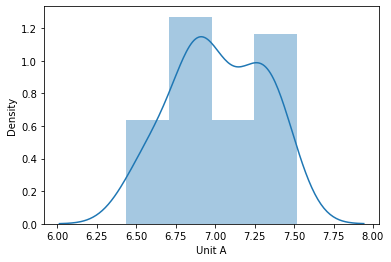

In [7]:
sns.distplot(df['Unit A'])


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit B', ylabel='Density'>

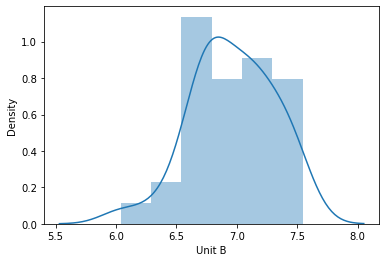

In [8]:
sns.distplot(df['Unit B'])


In [9]:
alpha =0.05

In [10]:
print("alpha=",alpha)

alpha= 0.05


In [11]:
alpha=0.05
units=df.iloc[:]
print(units)

    Unit A  Unit B
0   6.8090  6.7703
1   6.4376  7.5093
2   6.9157  6.7300
3   7.3012  6.7878
4   7.4488  7.1522
5   7.3871  6.8110
6   6.8755  7.2212
7   7.0621  6.6606
8   6.6840  7.2402
9   6.8236  7.0503
10  7.3930  6.8810
11  7.5169  7.4059
12  6.9246  6.7652
13  6.9256  6.0380
14  6.5797  7.1581
15  6.8394  7.0240
16  6.5970  6.6672
17  7.2705  7.4314
18  7.2828  7.3070
19  7.3495  6.7478
20  6.9438  6.8889
21  7.1560  7.4220
22  6.5341  6.5217
23  7.2854  7.1688
24  6.9952  6.7594
25  6.8568  6.9399
26  7.2163  7.0133
27  6.6801  6.9182
28  6.9431  6.3346
29  7.0852  7.5459
30  6.7794  7.0992
31  7.2783  7.1180
32  7.1561  6.6965
33  7.3943  6.5780
34  6.9405  7.3875


In [12]:
UnitA=pd.DataFrame(df['Unit A'])
UnitB=pd.DataFrame(df['Unit B'])
print(UnitA,UnitB)


    Unit A
0   6.8090
1   6.4376
2   6.9157
3   7.3012
4   7.4488
5   7.3871
6   6.8755
7   7.0621
8   6.6840
9   6.8236
10  7.3930
11  7.5169
12  6.9246
13  6.9256
14  6.5797
15  6.8394
16  6.5970
17  7.2705
18  7.2828
19  7.3495
20  6.9438
21  7.1560
22  6.5341
23  7.2854
24  6.9952
25  6.8568
26  7.2163
27  6.6801
28  6.9431
29  7.0852
30  6.7794
31  7.2783
32  7.1561
33  7.3943
34  6.9405     Unit B
0   6.7703
1   7.5093
2   6.7300
3   6.7878
4   7.1522
5   6.8110
6   7.2212
7   6.6606
8   7.2402
9   7.0503
10  6.8810
11  7.4059
12  6.7652
13  6.0380
14  7.1581
15  7.0240
16  6.6672
17  7.4314
18  7.3070
19  6.7478
20  6.8889
21  7.4220
22  6.5217
23  7.1688
24  6.7594
25  6.9399
26  7.0133
27  6.9182
28  6.3346
29  7.5459
30  7.0992
31  7.1180
32  6.6965
33  6.5780
34  7.3875


In [13]:

UnitA=pd.DataFrame(df['Unit A'])
UnitB=pd.DataFrame(df['Unit B'])
print(UnitA,UnitB)
tStat,pValue =sp.stats.ttest_ind(UnitA,UnitB)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

    Unit A
0   6.8090
1   6.4376
2   6.9157
3   7.3012
4   7.4488
5   7.3871
6   6.8755
7   7.0621
8   6.6840
9   6.8236
10  7.3930
11  7.5169
12  6.9246
13  6.9256
14  6.5797
15  6.8394
16  6.5970
17  7.2705
18  7.2828
19  7.3495
20  6.9438
21  7.1560
22  6.5341
23  7.2854
24  6.9952
25  6.8568
26  7.2163
27  6.6801
28  6.9431
29  7.0852
30  6.7794
31  7.2783
32  7.1561
33  7.3943
34  6.9405     Unit B
0   6.7703
1   7.5093
2   6.7300
3   6.7878
4   7.1522
5   6.8110
6   7.2212
7   6.6606
8   7.2402
9   7.0503
10  6.8810
11  7.4059
12  6.7652
13  6.0380
14  7.1581
15  7.0240
16  6.6672
17  7.4314
18  7.3070
19  6.7478
20  6.8889
21  7.4220
22  6.5217
23  7.1688
24  6.7594
25  6.9399
26  7.0133
27  6.9182
28  6.3346
29  7.5459
30  7.0992
31  7.1180
32  6.6965
33  6.5780
34  7.3875
P-Value:[0.47223947] T-Statistic:[0.72286887]


In [14]:
if pValue <0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we accept null hypothesis


# A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 


In [15]:
data=pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\assignmanet 3\\LabTAT.csv")

In [16]:
data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [17]:
data.tail()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87
119,182.09,215.17,221.49,162.21


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Laboratory 1', ylabel='Density'>

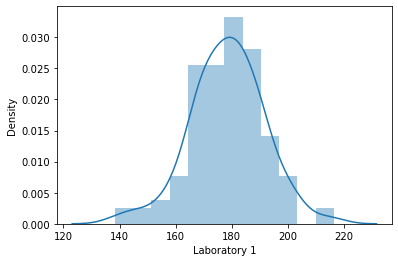

In [18]:
sns.distplot(data['Laboratory 1'])


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Laboratory 2', ylabel='Density'>

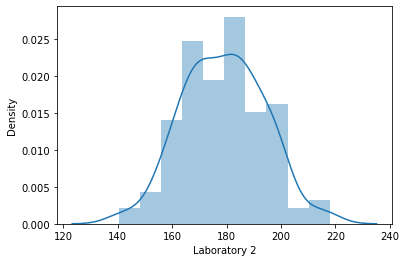

In [19]:
sns.distplot(data['Laboratory 2'])


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Laboratory 3', ylabel='Density'>

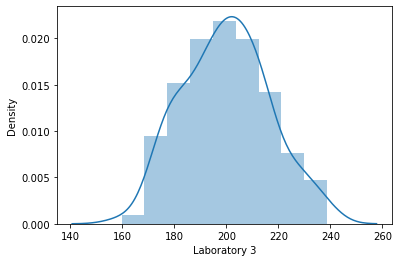

In [20]:
sns.distplot(data['Laboratory 3'])


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Laboratory 4', ylabel='Density'>

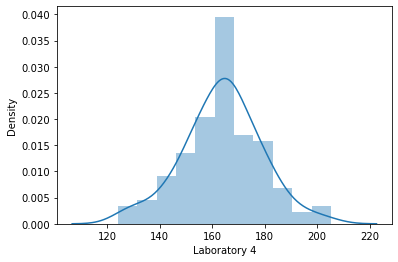

In [21]:
sns.distplot(data['Laboratory 4'])


In [22]:
alpha=0.05
results=data.iloc[:,[0,1,2,3]]
print(results)
print('alpha',alpha)

     Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
0          185.35        165.53        176.70        166.13
1          170.49        185.91        198.45        160.79
2          192.77        194.92        201.23        185.18
3          177.33        183.00        199.61        176.42
4          193.41        169.57        204.63        152.60
..            ...           ...           ...           ...
115        178.49        170.66        193.80        172.68
116        176.08        183.98        215.25        177.64
117        202.48        174.54        203.99        170.27
118        182.40        197.18        194.52        150.87
119        182.09        215.17        221.49        162.21

[120 rows x 4 columns]
alpha 0.05


In [24]:
tStat, pvalue=stats.f_oneway(data.iloc[:,0], data.iloc[:,1],data.iloc[:,2],data.iloc[:,3])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))


P-Value:[0.47223947] T-Statistic:118.70421654401437


In [25]:
if pvalue < 0.05:

  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we reject null hypothesis


# Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.


In [26]:
df3=pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\assignmanet 3\\BuyerRatio.csv")

In [27]:
df3.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [28]:
df3.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [30]:
df3.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [31]:
df3.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='East', ylabel='Density'>

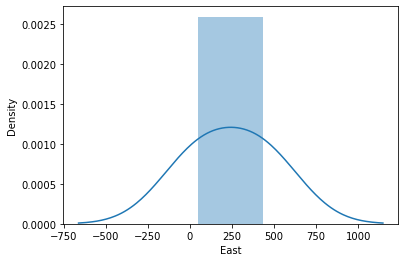

In [32]:
sns.distplot(df3['East'])


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='West', ylabel='Density'>

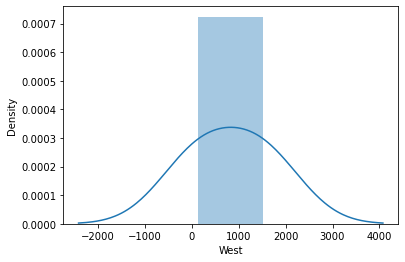

In [33]:
sns.distplot(df3['West'])


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='North', ylabel='Density'>

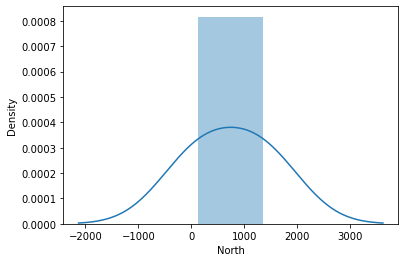

In [34]:
sns.distplot(df3['North'])


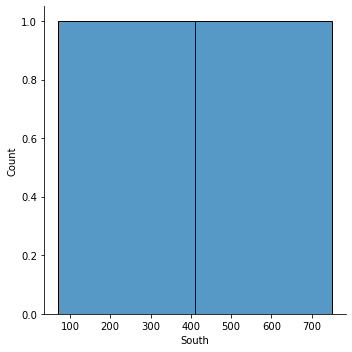

In [35]:
sns.displot(df3['South'])

In [36]:
alpha=0.05

In [37]:
print('alpha:-',alpha)

alpha:- 0.05


In [38]:
df3.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [39]:
sales=df3.iloc[:,1:]

In [40]:
print(sales)

   East  West  North  South
0    50   142    131     70
1   435  1523   1356    750


In [41]:
chiStats = sp.stats.chi2_contingency(sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')


Test t=1.595946 p-value=0.660309
Interpret by p-Value


In [42]:
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we accept null hypothesis


#     TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [43]:
df4=pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\assignmanet 3\\Costomer+OrderForm.csv")

In [44]:
df4.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [45]:
df4.tail()

,Phillippines,Indonesia,Malta,India
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free
299,Error Free,Defective,Defective,Error Free


In [46]:
df4.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [47]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [48]:
df4.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [49]:
df4.columns

Index(['Phillippines', 'Indonesia', 'Malta', 'India'], dtype='object')

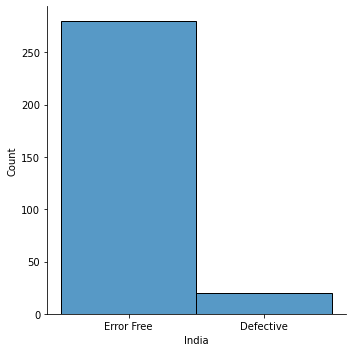

In [50]:
sns.displot(df4['India'])

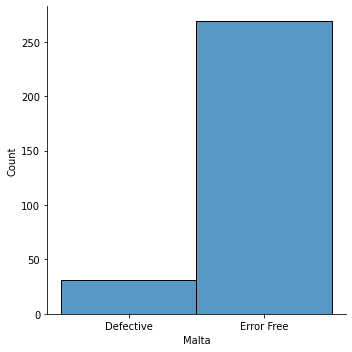

In [51]:
sns.displot(df4['Malta'])

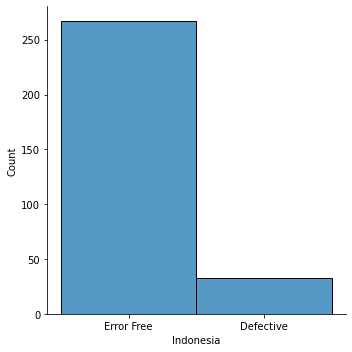

In [52]:
sns.displot(df4['Indonesia'])

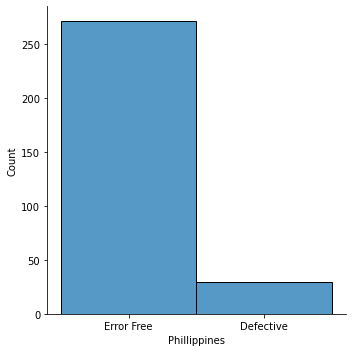

In [53]:
sns.displot(df4['Phillippines'])

In [54]:
values=[271-300,267-300,269-300,280-300]

In [55]:
values

[-29, -33, -31, -20]

In [56]:
total_values=[271,267,269,280],[29,33,31,20]

In [57]:
print(total_values)

([271, 267, 269, 280], [29, 33, 31, 20])


In [58]:
chiStats = sp.stats.chi2_contingency(total_values)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')


Test t=3.858961 p-value=0.277102
Interpret by p-Value


In [59]:
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we accept null hypothesis
